# Washington Post

This notebook is composed of two parts. The first one is the calculation of some metrics that were also calculated for the NYtimes and Foxnews. The second is the comparison of the three journals with some graphics.

# Table of contents
1. [Text2emotion by subject](#t)
    * 1.1 [Immigration](#imt)
    * 1.2 [Terrorism](#tet)
    * 1.3 [Climate Change](#cct)
    * 1.4 [Abortion](#abt)
    * 1.5 [Religion](#ret)
    * 1.6 [Racism](#rat)
    
    
    
2. [NLTK by subject](#n)
    * 2.1 [Immigration](#imn)
    * 2.2 [Terrorism](#ten)
    * 2.3 [Climate Change](#ccn)
    * 2.4 [Abortion](#abn)
    * 2.5 [Religion](#ren)
    * 2.6 [Racism](#ran)
       
       
       
3. [NLTK year by year](#ny)
    * 2.1 [2015](#5)
    * 2.2 [2016](#6)
    * 2.3 [2017](#7)
    * 2.4 [2018](#8)
    * 2.5 [2019](#9)
    * 2.6 [2020](#0)
    
    
       
4. [Comparison](#g)

In [4]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [69]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [70]:
#The chosen key words are selected here
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|violen|death'
words_ClimateChange = 'flood|greenhouse effect|CO2|global warming|pollution|glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'God|Christian|Christianism|Belief|faith|prayer|commitment|islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'White|Black|Black lives matter|All lives matter|discrimination|Segregation|George Floyd|Slaver|White supremacy|Klu Klux Klan|KKK|Gunshot|Trials|Police|Death sentence'

In [71]:
import text2emotion as te
sia = SentimentIntensityAnalyzer()

## Text2emotion<a name="t"></a>

### Immigration<a name="imt"></a>

In [72]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_immi_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_immi_t = df3_immi_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_immi_t = df3_immi_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_immi_t = df3_immi_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_immi_t = df3_immi_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_immi_t = df3_immi_t.append(newr, ignore_index = True)

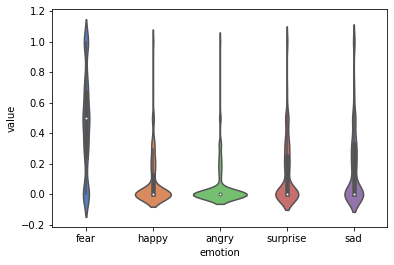

In [73]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_immi_t, palette = "muted")

In [74]:
#means
a = df3_immi_t[df3_immi_t['emotion'] == "fear"]['value'].mean()
b = df3_immi_t[df3_immi_t['emotion'] == "happy"]['value'].mean()
c = df3_immi_t[df3_immi_t['emotion'] == "angry"]['value'].mean()
d = df3_immi_t[df3_immi_t['emotion'] == "surprise"]['value'].mean()
e = df3_immi_t[df3_immi_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.4612888377445342
happy 0.08848676639815883
angry 0.05004027617951671
surprise 0.15226121979286547
sad 0.18511507479861886


In [75]:
lst = [df3_immi_t]
del lst 

### Terrorism<a name="tet"></a>

In [76]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_te_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_terrorism]
lista2 = ['terrorism']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_te_t = df3_te_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_te_t = df3_te_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_te_t = df3_te_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_te_t = df3_te_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_te_t = df3_te_t.append(newr, ignore_index = True)

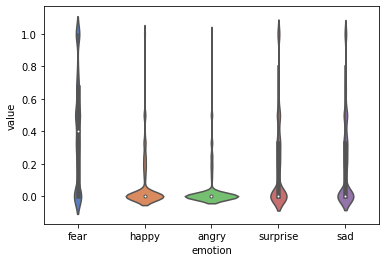

In [77]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_te_t, palette = "muted")

In [78]:
#means
a = df3_te_t[df3_te_t['emotion'] == "fear"]['value'].mean()
b = df3_te_t[df3_te_t['emotion'] == "happy"]['value'].mean()
c = df3_te_t[df3_te_t['emotion'] == "angry"]['value'].mean()
d = df3_te_t[df3_te_t['emotion'] == "surprise"]['value'].mean()
e = df3_te_t[df3_te_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.40691987079295505
happy 0.07414296134208637
angry 0.04269876002917566
surprise 0.19926018547462784
sad 0.205472543503179


In [79]:
lst = [df3_te_t]
del lst 

### Climate change<a name="cct"></a>

In [80]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_cc_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_ClimateChange]
lista2 = ['climate change']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_cc_t = df3_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_cc_t = df3_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_cc_t = df3_cc_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_cc_t = df3_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_cc_t = df3_cc_t.append(newr, ignore_index=True)

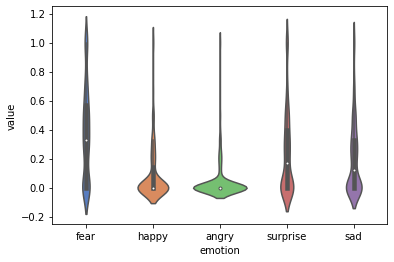

In [81]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_cc_t, palette = "muted")

In [82]:
#means
a = df3_cc_t[df3_cc_t['emotion'] == "fear"]['value'].mean()
b = df3_cc_t[df3_cc_t['emotion'] == "happy"]['value'].mean()
c = df3_cc_t[df3_cc_t['emotion'] == "angry"]['value'].mean()
d = df3_cc_t[df3_cc_t['emotion'] == "surprise"]['value'].mean()
e = df3_cc_t[df3_cc_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.3731568998109643
happy 0.08943289224952741
angry 0.0395085066162571
surprise 0.23595463137996228
sad 0.19867674858223072


In [83]:
lst = [df3_cc_t]
del lst 

### Abortion<a name="abt"></a>

In [84]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_ab_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_abortion]
lista2 = ['abortion']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_ab_t = df3_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_ab_t = df3_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_ab_t = df3_ab_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_ab_t = df3_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_ab_t = df3_ab_t.append(newr, ignore_index = True)

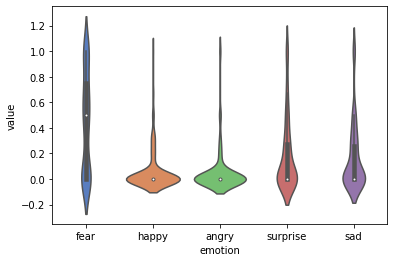

In [85]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_ab_t, palette = "muted")

In [86]:
#means
a = df3_ab_t[df3_ab_t['emotion'] == "fear"]['value'].mean()
b = df3_ab_t[df3_ab_t['emotion'] == "happy"]['value'].mean()
c = df3_ab_t[df3_ab_t['emotion'] == "angry"]['value'].mean()
d = df3_ab_t[df3_ab_t['emotion'] == "surprise"]['value'].mean()
e = df3_ab_t[df3_ab_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.4361748633879782
happy 0.05693989071038252
angry 0.04961748633879781
surprise 0.1908196721311475
sad 0.16765027322404366


In [87]:
lst = [df3_ab_t]
del lst 

### Religion<a name="ret"></a>

In [88]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_re_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_religion]
lista2 = ['religion']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_re_t = df3_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_re_t = df3_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_re_t = df3_re_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_re_t = df3_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_re_t = df3_re_t.append(newr, ignore_index = True)

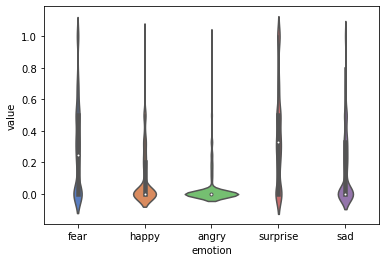

In [89]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df3_re_t, palette = "muted")

In [90]:
#means
a = df3_re_t[df3_re_t['emotion'] == "fear"]['value'].mean()
b = df3_re_t[df3_re_t['emotion'] == "happy"]['value'].mean()
c = df3_re_t[df3_re_t['emotion'] == "angry"]['value'].mean()
d = df3_re_t[df3_re_t['emotion'] == "surprise"]['value'].mean()
e = df3_re_t[df3_re_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.3008911260253545
happy 0.10951901565995519
angry 0.03336316181953768
surprise 0.3482252050708432
sad 0.17144295302013374


In [91]:
lst = [df3_re_t]
del lst 

### Racisme<a name="rat"></a>

In [92]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df3_ra_t = pd.DataFrame(columns=['emotion','value'])

lista = [words_racism]
lista2 = ['racism']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear}, name = 'x')
    df3_ra_t = df3_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy}, name = 'x')
    df3_ra_t = df3_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry}, name = 'x')
    df3_ra_t = df3_ra_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise}, name = 'x')
    df3_ra_t = df3_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad}, name = 'x')
    df3_ra_t = df3_ra_t.append(newr, ignore_index = True)

In [95]:
#means
a = df3_ra_t[df3_ra_t['emotion'] == "fear"]['value'].mean()
b = df3_ra_t[df3_ra_t['emotion'] == "happy"]['value'].mean()
c = df3_ra_t[df3_ra_t['emotion'] == "angry"]['value'].mean()
d = df3_ra_t[df3_ra_t['emotion'] == "surprise"]['value'].mean()
e = df3_ra_t[df3_ra_t['emotion'] == "sad"]['value'].mean()


print("fear {0}".format(a))
print("happy {0}".format(b))
print("angry {0}".format(c))
print("surprise {0}".format(d))
print("sad {0}".format(e))

fear 0.5406943498978896
happy 0.08205582028590884
angry 0.03906739278420693
surprise 0.13570456092579983
sad 0.1536759700476514


## NLTK<a name="n"></a>

In [13]:
sia = SentimentIntensityAnalyzer()

### Immigration<a name="imn"></a>

In [14]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_immi_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_immi_n = df3_immi_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_immi_n = df3_immi_n.append(newr, ignore_index=True)

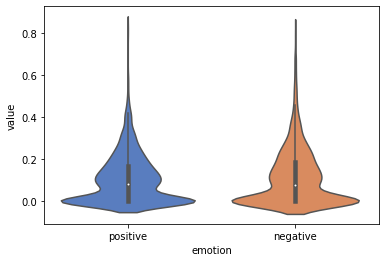

In [15]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df3_immi_n, palette = "muted")

In [16]:
a = df3_immi_n[df3_immi_n['emotion'] == "positive"]['value'].mean()
b = df3_immi_n[df3_immi_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [17]:
lst = [df3_immi_n]
del lst     

### Terrorism<a name="ten"></a>

In [18]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_te_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_te_n = df3_te_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_te_n = df3_te_n.append(newr, ignore_index=True)

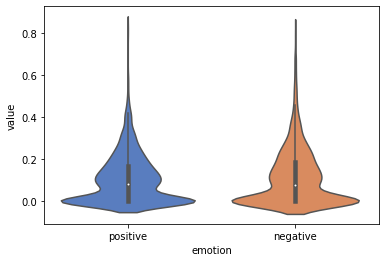

In [19]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df3_te_n, palette = "muted")

In [20]:
a = df3_te_n[df3_te_n['emotion'] == "positive"]['value'].mean()
b = df3_te_n[df3_te_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [21]:
lst = [df3_te_n]
del lst  

### Climate change<a name="ccn"></a>

In [22]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_cc_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_cc_n = df3_cc_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_cc_n = df3_cc_n.append(newr, ignore_index=True)

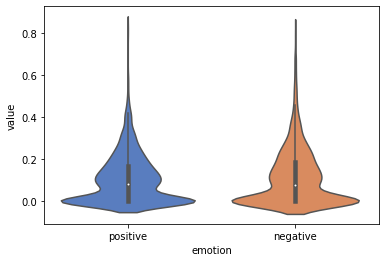

In [23]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_cc_n, palette = "muted")

In [24]:
a = df3_cc_n[df3_cc_n['emotion'] == "positive"]['value'].mean()
b = df3_cc_n[df3_cc_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [25]:
lst = [df3_cc_n]
del lst  

### Abortion<a name="abn"></a>

In [26]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_ab_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_ab_n = df3_ab_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_ab_n = df3_ab_n.append(newr, ignore_index=True)

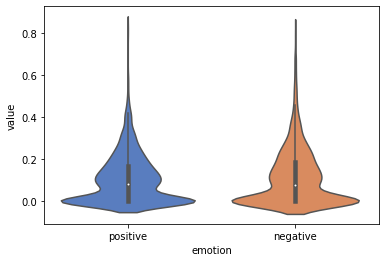

In [27]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_ab_n, palette = "muted")

In [28]:
a = df3_ab_n[df3_ab_n['emotion'] == "positive"]['value'].mean()
b = df3_ab_n[df3_ab_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [29]:
lst = [df3_ab_n]
del lst  

### Religion<a name="ren"></a>

In [30]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_re_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_re_n = df3_re_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_re_n = df3_re_n.append(newr, ignore_index=True)

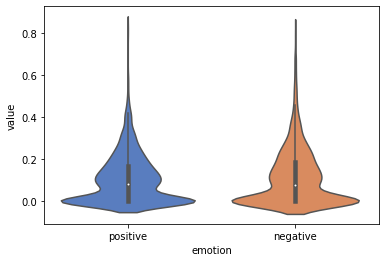

In [31]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_re_n, palette = "muted")

In [32]:
a = df3_re_n[df3_re_n['emotion'] == "positive"]['value'].mean()
b = df3_re_n[df3_re_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [33]:
lst = [df3_re_n]
del lst  

### Racisme<a name="ran"></a>

In [34]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df3_ra_n = pd.DataFrame(columns=['emotion','value'])

lista = [words_immigration]
lista2 = ['immigration']


df3_word = df3[df3['quotation'].str.contains([l for l in lista][0])]
count3 = len(df3_word)
n = len(df_fox)

for quotation in df3_word['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df3_ra_n = df3_ra_n.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df3_ra_n = df3_ra_n.append(newr, ignore_index=True)

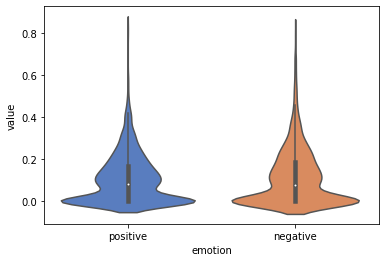

In [35]:
sns.violinplot(x = 'emotion', y = "value",
                    data=df3_ra_n, palette = "muted")

In [36]:
a = df3_ra_n[df3_ra_n['emotion'] == "positive"]['value'].mean()
b = df3_ra_n[df3_ra_n['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.10375086306098985
negative 0.11154718066743395


In [37]:
lst = [df3, df3_y]
del lst  

## NLTK Year by year<a name="ny"></a>

### 2015<a name="5"></a>

In [40]:
#Loading the data for this specific year 
years = [2015]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [41]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2015 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2015 = df_2015.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2015 = df_2015.append(newr, ignore_index = True)

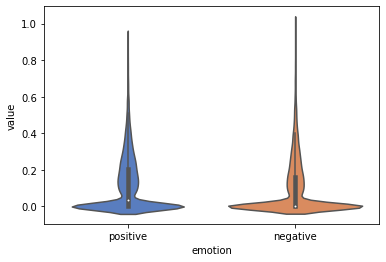

In [42]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2015, palette = "muted")

In [43]:
a = df_2015[df_2015['emotion'] == "positive"]['value'].mean()
b = df_2015[df_2015['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.11645209027007042
negative 0.09463808731039607


In [44]:
lst = [df_2015]
del lst  

### 2016<a name="6"></a>

In [45]:
#Loading the data for this specific year 
years = [2016]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [46]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2016 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2016 = df_2016.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2016 = df_2016.append(newr, ignore_index = True)

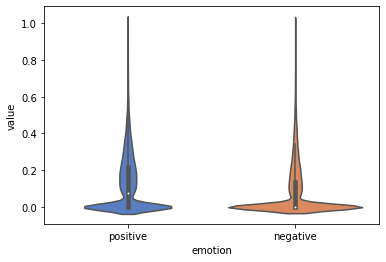

In [47]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2016, palette = "muted")

In [48]:
a = df_2016[df_2016['emotion'] == "positive"]['value'].mean()
b = df_2016[df_2016['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.12563308589607675
negative 0.08306436314363096


In [49]:
lst = [df_2016]
del lst  

### 2017<a name="7"></a>

In [50]:
#Loading the data for this specific year 
years = [2017]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [51]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2017 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2017 = df_2017.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2017 = df_2017.append(newr, ignore_index = True)

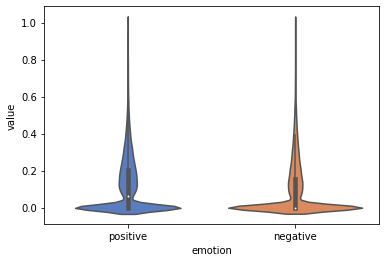

In [52]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2017, palette = "muted")

In [53]:
a = df_2017[df_2017['emotion'] == "positive"]['value'].mean()
b = df_2017[df_2017['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.11792081634377857
negative 0.09250681342826393


In [54]:
lst = [df_2017]
del lst  

### 2018<a name="8"></a>

In [55]:
#Loading the data for this specific year 
years = [2018]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [56]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2018 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2018 = df_2018.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2018 = df_2018.append(newr, ignore_index = True)

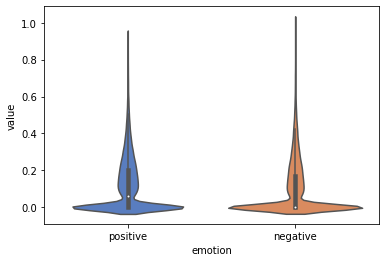

In [57]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2018, palette = "muted")

In [58]:
a = df_2018[df_2018['emotion'] == "positive"]['value'].mean()
b = df_2018[df_2018['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.11712005108556807
negative 0.09834581204767968


In [59]:
lst = [df_2018]
del lst  

### 2019<a name="9"></a>

In [60]:
#Loading the data for this specific year 
years = [2019]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [61]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2019 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2019 = df_2019.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2019 = df_2019.append(newr, ignore_index = True)

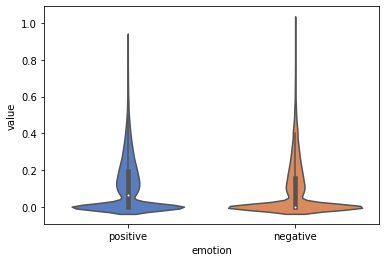

In [62]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2019, palette = "muted")

In [63]:
a = df_2019[df_2019['emotion'] == "positive"]['value'].mean()
b = df_2019[df_2019['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.11569578006972742
negative 0.09473830621731531


In [64]:
lst = [df_2019]
del lst  

### 2020<a name="0"></a>

In [65]:
#Loading the data for this specific year 
years = [2020]
PATH = 'data/'

df3 = pd.DataFrame(columns = ['quotation'])

for y in years:
    df3_y = pd.read_pickle(PATH+str(y)+'_'+'Washington_quotations.pkl')
    df3_y = df3_y.to_frame()
    df3 = df3.append(df3_y)

In [66]:
#Creating the dataframe with all the sentiment values from the nltk analysis
df_2020 = pd.DataFrame(columns = ['emotion','value'])


for quotation in df3['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    
    newr = pd.Series(data = {'emotion': "positive", 'value': pos}, name = 'x')
    df_2020 = df_2020.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "negative", 'value': neg}, name = 'x')
    df_2020 = df_2020.append(newr, ignore_index = True)

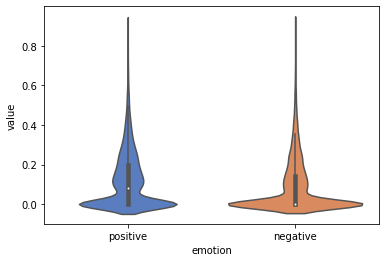

In [67]:
sns.violinplot(x = 'emotion', y = "value",
                    data = df_2020, palette = "muted")

In [68]:
a = df_2020[df_2020['emotion'] == "positive"]['value'].mean()
b = df_2020[df_2020['emotion'] == "negative"]['value'].mean()

print("positive {0}".format(a))
print("negative {0}".format(b))

positive 0.11780602966980368
negative 0.08588881799330034


## Comparison<a name="g"></a>

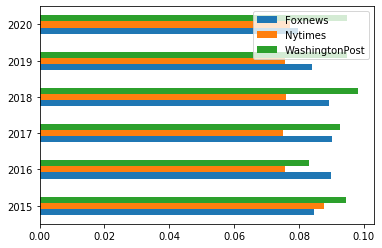

In [98]:
#negative nltk accross the years graphics, values from the Ny times and Foxnews were printed in other notebooks
Foxnews = [0.08460186549682747, 0.08982915883001527, 0.09031551686457373, 0.08932449686837941,
        0.08390509712436937, 0.07977823563551907]
Nytimes = [0.08762264150943382, 0.07555322827908305, 0.07493777566340601, 0.07592907038524226, 
        0.07564601349876199, 0.07730176613885521]
WashingtonPost = [0.09463808731039607, 0.08306436314363096, 0.09250681342826393, 0.09834581204767968, 
        0.09473830621731531, 0.09473830621731531]

index = ['2015', '2016', '2017',
         '2018', '2019', '2020']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes,'WashingtonPost': WashingtonPost}, index = index)
ax = df.plot.barh()

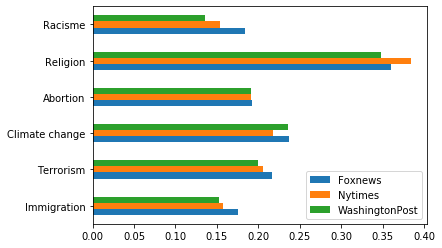

In [99]:
#surprise text2emotion accross the years graphics
Foxnews = [0.17517087308296242, 0.21587498458882556, 0.23715737951807267, 0.19239004149377587,
        0.3598325153852094, 0.18358656174334273]
Nytimes = [0.15778762767392618, 0.20558429299602934, 0.2173465346534656, 0.1906128550074739, 
        0.38464121054497746, 0.15313429988554034]
WashingtonPost = [0.15226121979286547, 0.19926018547462784, 0.23595463137996228, 0.1908196721311475, 
        0.3482252050708432, 0.13570456092579983]

index = ['Immigration', 'Terrorism', 'Climate change',
         'Abortion', 'Religion', 'Racisme']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes,'WashingtonPost': WashingtonPost}, index = index)
ax = df.plot.barh() 